# Introduction to project

Airbnb is an online marketplace and hospitality service that allows individuals to rent out their homes, apartments, or spare rooms to travellers on a short-term basis. It offers a platform where hosts can list their accommodations and connect with potential guests from around the world. Guests can search and book various types of accommodations, ranging from a private room in a shared apartment to an entire house or villa. 

The CEO has come to you, their resident Data Scientist to  help the business understand their data so that they can look for areas of the business where they can be more efficient.

In [1]:
#importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster

### Plan
- Data Cleaning
- Exploration Data Anaylsis
- Key Findings


In [2]:
airbnb = pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\hp-\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#total number of data
len(airbnb)

102599

In [4]:
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Data Cleaning

In [7]:
#Checking for nulls in data
airbnb.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
#Converting service fee and price from object to float
airbnb['service fee']

0         $193 
1          $28 
2         $124 
3          $74 
4          $41 
          ...  
102594    $169 
102595    $167 
102596    $198 
102597    $109 
102598    $206 
Name: service fee, Length: 102599, dtype: object

In [9]:
airbnb['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [10]:
#removing '$'
airbnb['service fee'] = airbnb['service fee'].str.replace('[^\d.]', '', regex=True)
airbnb['price'] = airbnb['price'].str.replace('[^\d.]', '', regex=True)

In [11]:
#conversion
airbnb['service fee'] = pd.to_numeric(airbnb['service fee'])
airbnb['price'] = pd.to_numeric(airbnb['price'])

In [12]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [13]:
airbnb.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [14]:
# List of columns with missing numerical data
columns_with_missing_data = ['price', 'service fee', 'Construction year', 'number of reviews', 'calculated host listings count', 'minimum nights', 'reviews per month', 'availability 365']

# Fill missing numerical data with the mean for each column
for column_name in columns_with_missing_data:
    mean_value = airbnb[column_name].mean()
    airbnb[column_name].fillna(mean_value, inplace=True)

In [15]:
airbnb.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                      0
last review                        15893
reviews per month                      0
review rate number                   326
calculated host listings count         0
availability 365                       0
house_rules     

In [16]:
#dropping unneeded columns

columns_to_drop = ['id', 'host name', 'country code', 'license']

airbnb.drop(columns=columns_to_drop, inplace=True)

In [17]:
airbnb.columns

Index(['NAME', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules'],
      dtype='object')

In [18]:
# Remove missing data
airbnb.dropna(inplace=True)
airbnb = airbnb.dropna() 

In [19]:
airbnb.isna().sum()

NAME                              0
host id                           0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
dtype: int64

In [20]:
len(airbnb)

40455

## Exploratory Data Analysis

In [21]:
airbnb.head()

,NAME,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,False,strict,...,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,United States,False,moderate,...,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,False,moderate,...,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,True,flexible,...,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
7,BlissArtsSpace!,90821839709,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,False,moderate,...,1060.0,212.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...


In [22]:
airbnb.describe()

,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,4.045500e+04,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,4.922387e+10,40.727796,-73.950382,2012.528490,623.336160,124.633135,6.090239,28.899147,1.347989,3.220492,4.765291,135.536731
std,2.844949e+10,0.055531,0.047693,5.736549,332.010522,66.395033,35.734665,44.502030,1.647709,1.320694,23.074077,132.650169
min,1.236005e+08,40.506410,-74.244420,2003.000000,50.000000,10.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.470707e+10,40.688490,-73.982100,2008.000000,338.000000,67.000000,1.000000,3.000000,0.190000,2.000000,1.000000,3.000000
50%,4.900902e+10,40.721590,-73.954210,2012.487464,623.000000,125.000000,2.000000,10.000000,0.680000,3.000000,1.000000,90.000000
75%,7.377372e+10,40.763040,-73.933870,2018.000000,912.000000,182.000000,4.000000,35.000000,2.000000,4.000000,2.000000,251.000000
max,9.875746e+10,40.913060,-73.712990,2022.000000,1200.000000,240.000000,5645.000000,629.000000,58.500000,5.000000,327.000000,426.000000


In [23]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 102595
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            40455 non-null  object 
 1   host id                         40455 non-null  int64  
 2   host_identity_verified          40455 non-null  object 
 3   neighbourhood group             40455 non-null  object 
 4   neighbourhood                   40455 non-null  object 
 5   lat                             40455 non-null  float64
 6   long                            40455 non-null  float64
 7   country                         40455 non-null  object 
 8   instant_bookable                40455 non-null  object 
 9   cancellation_policy             40455 non-null  object 
 10  room type                       40455 non-null  object 
 11  Construction year               40455 non-null  float64
 12  price                          

### Plotting the location of airbnb listings

In [24]:
long=--73.97237
lat=40.64749
locations = list(zip(airbnb.lat, airbnb.long))

map1 = folium.Map(location=[lat,long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Scatter Plot to show the neighbourhood group based on Latitude and Longitude

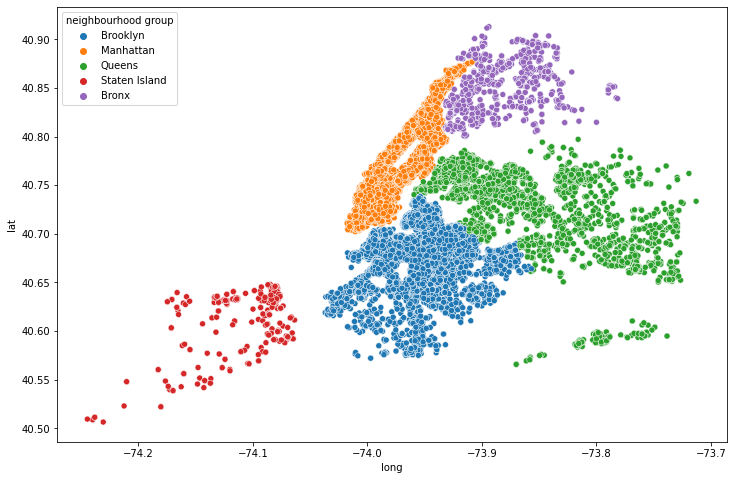

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=airbnb.long, y=airbnb.lat, hue=airbnb['neighbourhood group'])
plt.show()

## Checking the Most Used Words in Listings

In [26]:
airbnb['NAME'].head(20)

0                   Clean & quiet apt home by the park
1                                Skylit Midtown Castle
4     Entire Apt: Spacious Studio/Loft by central park
5            Large Cozy 1 BR Apartment In Midtown East
7                                      BlissArtsSpace!
8                      Large Furnished Room Near B'way
9                   Cozy Clean Guest Room - Family Apt
11                    Beautiful 1br on Upper West Side
12                     Central Manhattan/near Broadway
15                       West Village Nest - Superhost
38                           Cute apt in artist's home
42                 Beautiful Sunny Park Slope Brooklyn
44                                   West Side Retreat
49                           bright and stylish duplex
50                              Fort Greene brownstone
51     Blue Room for 2 in Brownstone for $1350 monthly
52      Cozy 1BD on Central Park West in New York City
54                      Greenpoint Place...Has It All!
55        

In [27]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
#x = airbnb['NAME'].astype(str)
#listToStr = ' '.join([str(elem) for elem in x if elem not in STOPWORDS]).lower()

In [29]:
#x = airbnb['NAME'].astype(str)
#listToStr = ' '.join([str(elem) for elem in x if elem not in STOPWORDS]).lower()

#plt.figure(figsize = (20,20))
#wordcloud = WordCloud(width=800,height=600,min_font_size=10).generate(listToStr)
#plt.imshow(wordcloud)

In [30]:
airbnb.columns

Index(['NAME', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules'],
      dtype='object')

### Country

In [31]:
airbnb['country'].unique

<bound method Series.unique of 0         United States
1         United States
4         United States
5         United States
7         United States
              ...      
102587    United States
102588    United States
102591    United States
102593    United States
102595    United States
Name: country, Length: 40455, dtype: object>

* All airbnb listings are in the United States

In [32]:
country_count = airbnb['country'].value_counts(dropna = False)
country_count

United States    40455
Name: country, dtype: int64

### Neighbourhood

In [33]:
neighbourhood_count = airbnb['neighbourhood'].value_counts(dropna = False)
neighbourhood_count

Bedford-Stuyvesant            3327
Williamsburg                  3260
Harlem                        2329
Bushwick                      2044
Hell's Kitchen                1567
                              ... 
Willowbrook                      2
Shore Acres                      1
Eltingville                      1
Co-op City                       1
Bay Terrace, Staten Island       1
Name: neighbourhood, Length: 218, dtype: int64

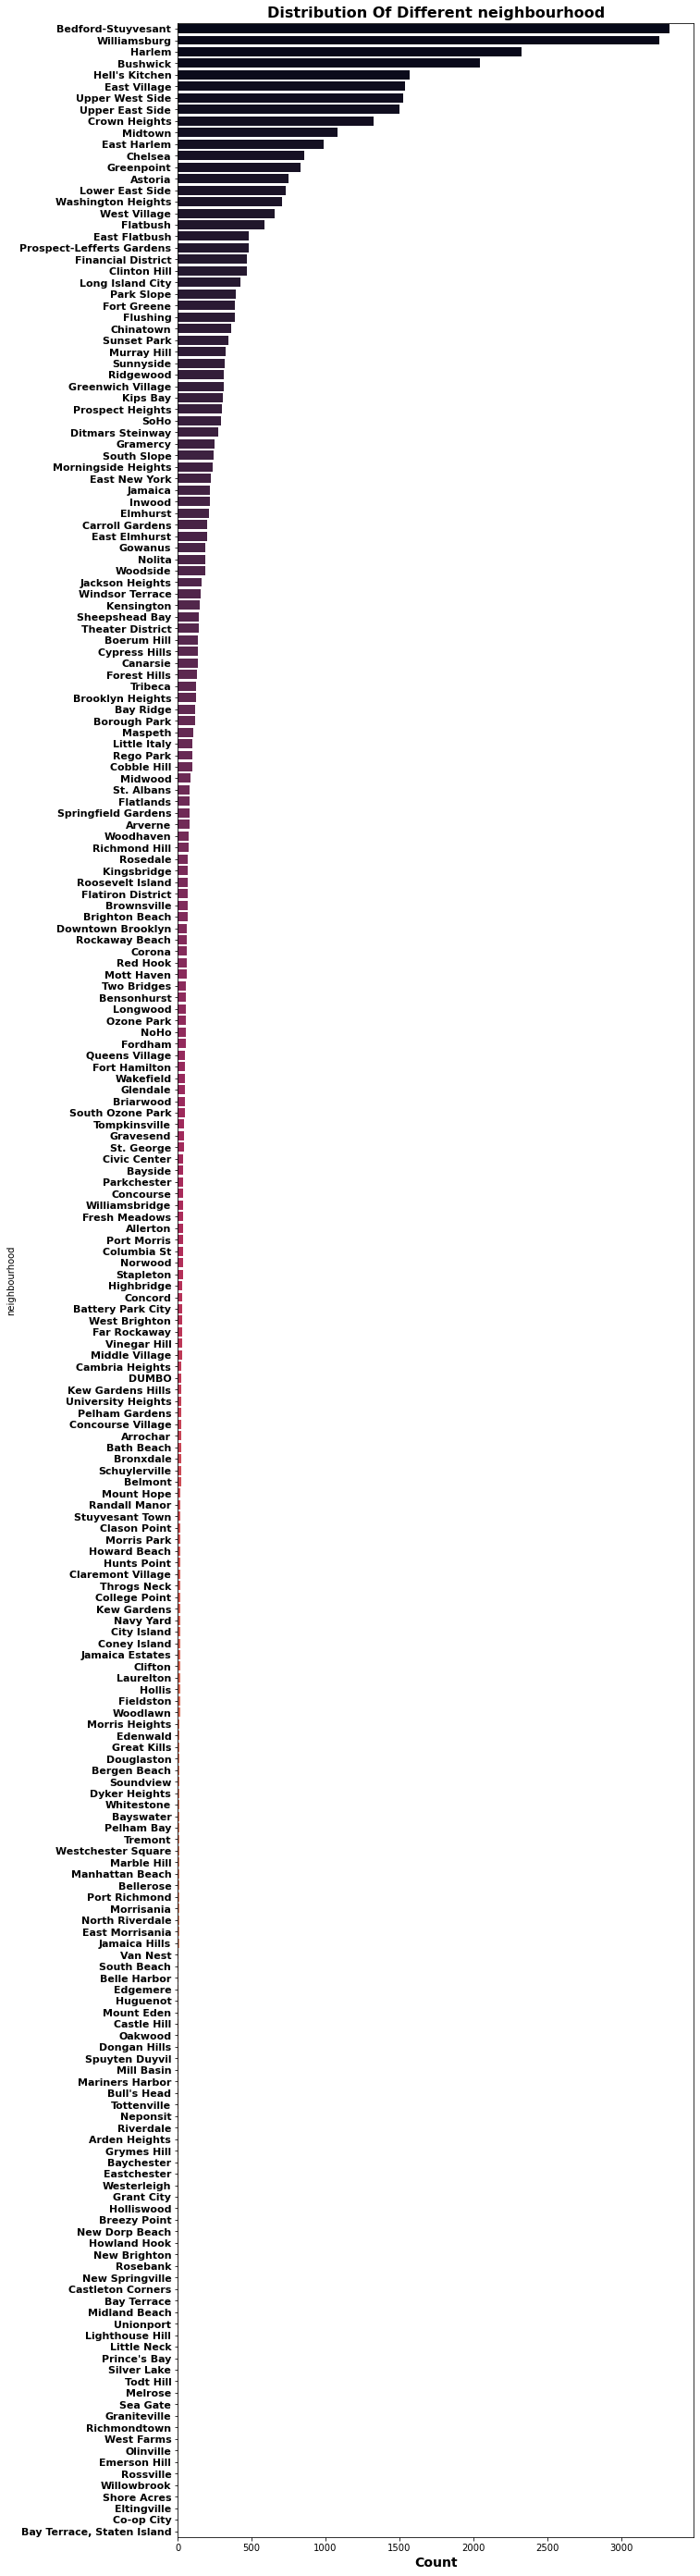

In [34]:
plt.figure(figsize = (10,50))
ax = sns.countplot(y=airbnb['neighbourhood'],order=airbnb['neighbourhood'].value_counts().index,palette='rocket')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11,fontweight='bold')
ax.set_title('Distribution Of Different neighbourhood',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()


In [35]:
neighbourhoodgroup_count = airbnb['neighbourhood group'].value_counts(dropna = False)
neighbourhoodgroup_count

Manhattan        17124
Brooklyn         17097
Queens            4924
Bronx              942
Staten Island      368
Name: neighbourhood group, dtype: int64

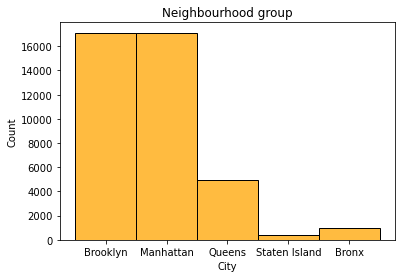

In [36]:
sns.histplot(data = airbnb, x = 'neighbourhood group', bins = 20, color='orange', alpha=0.75)
plt.title('Neighbourhood group')
plt.xlabel('City')
plt.ylabel('Count');

### Room type

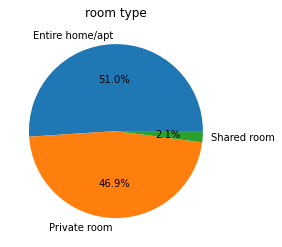

In [37]:
room_type_counts = airbnb['room type'].value_counts()
plt.pie(room_type_counts, labels = room_type_counts.index, autopct='%1.1f%%')
plt.title('room type');

### Hosts (IDs) with the most listings on Airbnb

In [38]:
top_host=airbnb["host id"].value_counts().head(10)
top_host

27113703924    2
71889739752    2
41415392592    2
20091049290    2
84392886434    2
49234547556    2
11750337247    2
7890725904     2
9995186139     2
34067158534    2
Name: host id, dtype: int64

### Instant_bookable Listings

In [39]:
instant_bookable_count = airbnb['instant_bookable'].value_counts(dropna = False)
instant_bookable_count

False    20297
True     20158
Name: instant_bookable, dtype: int64

### Construction_year

In [40]:
Construction_year_count = airbnb['Construction year'].value_counts(dropna = False)
Construction_year_count

2015.000000    2136
2019.000000    2124
2006.000000    2079
2008.000000    2076
2010.000000    2062
2009.000000    2059
2014.000000    2057
2021.000000    2034
2020.000000    2026
2005.000000    2025
2012.000000    2021
2018.000000    1996
2017.000000    1987
2011.000000    1986
2007.000000    1974
2022.000000    1966
2016.000000    1962
2004.000000    1931
2003.000000    1928
2013.000000    1911
2012.487464     115
Name: Construction year, dtype: int64

In [41]:
airbnb['Construction year'] = airbnb['Construction year'].astype(int)

In [42]:
airbnb['Construction year'] = airbnb['Construction year'].floordiv(1)
airbnb['Construction year']

0         2020
1         2007
4         2009
5         2013
7         2009
          ... 
102587    2005
102588    2016
102591    2005
102593    2017
102595    2016
Name: Construction year, Length: 40455, dtype: int32

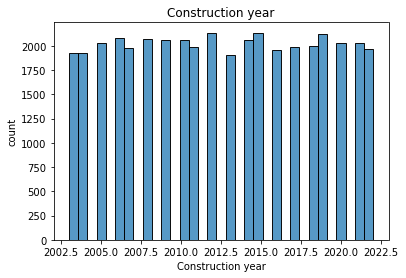

In [43]:
sns.histplot(data = airbnb, x = 'Construction year', alpha=0.75)
plt.title('Construction year')
plt.xlabel('Construction year')
plt.ylabel('count');

### Cancellation policy

In [44]:
cancellation_policy_count = airbnb['cancellation_policy'].value_counts(dropna = False)
cancellation_policy_count

moderate    13576
strict      13504
flexible    13375
Name: cancellation_policy, dtype: int64

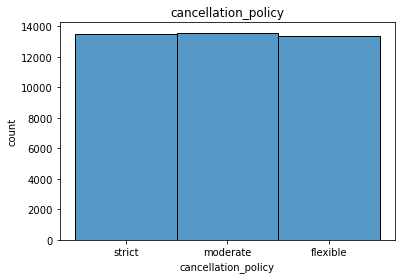

In [45]:
sns.histplot(data = airbnb, x = 'cancellation_policy', bins = 10, alpha=0.75)
plt.title('cancellation_policy')
plt.xlabel('cancellation_policy')
plt.ylabel('count');

### Top 5 most expensive neighborhood

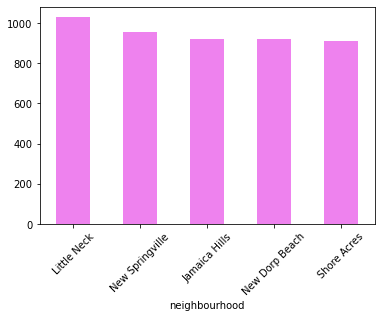

In [46]:
a = airbnb.groupby(airbnb['neighbourhood'])['price'].mean().sort_values(ascending = False).head(5)
a.plot(kind = 'bar', color = 'violet');
plt.xticks(rotation=45);

### Average reviews per neighbourhood

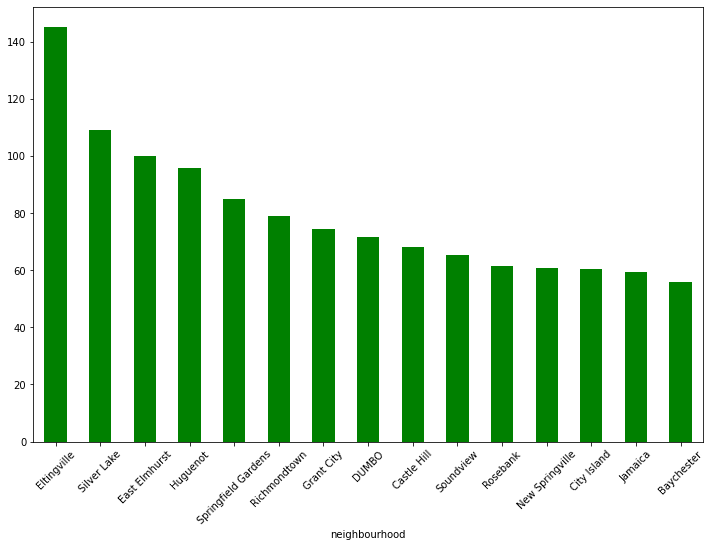

In [47]:
plt.figure(figsize = (12, 8))
b = airbnb.groupby(airbnb['neighbourhood'])['number of reviews'].mean().sort_values(ascending = False).head(15)
b.plot(kind = 'bar', color = 'green');
plt.xticks(rotation=45);

### Average reviews per neighbourhood group

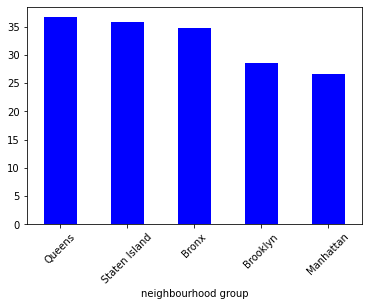

In [48]:
n = airbnb.groupby(airbnb['neighbourhood group'])['number of reviews'].mean().sort_values(ascending = False)
n.plot(kind = 'bar', color = 'blue');
plt.xticks(rotation=45);

### Relationship between neighbourhood group and price

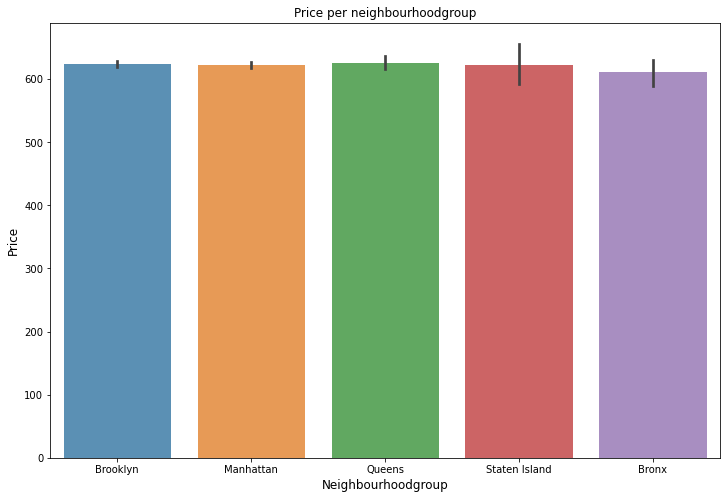

In [49]:
plt.figure(figsize = (12, 8))
sns.barplot(x = airbnb['neighbourhood group'], y = airbnb['price'], alpha = 0.8)
plt.title('Price per neighbourhoodgroup')
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Neighbourhoodgroup', fontsize = 12)
plt.show()

### Relationship between neighborhood group and number of reviews

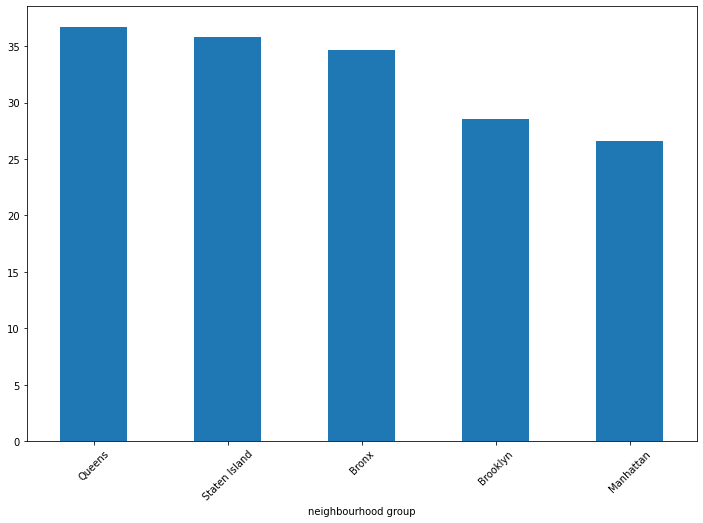

In [50]:
plt.figure(figsize = (12, 8))
b = airbnb.groupby(airbnb['neighbourhood group'])['number of reviews'].mean().sort_values(ascending = False)
b.plot(kind = 'bar');
plt.xticks(rotation=45);

### Relationship between room type and price

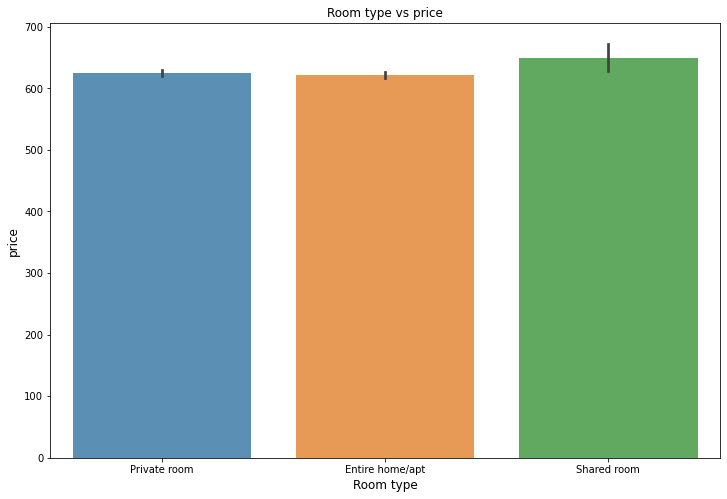

In [51]:
plt.figure(figsize = (12, 8))
sns.barplot(x = airbnb['room type'], y = airbnb['price'], alpha = 0.8)
plt.title('Room type vs price')
plt.ylabel('price', fontsize = 12)
plt.xlabel('Room type', fontsize = 12)
plt.show()

### Relationship between room type and number of reviews

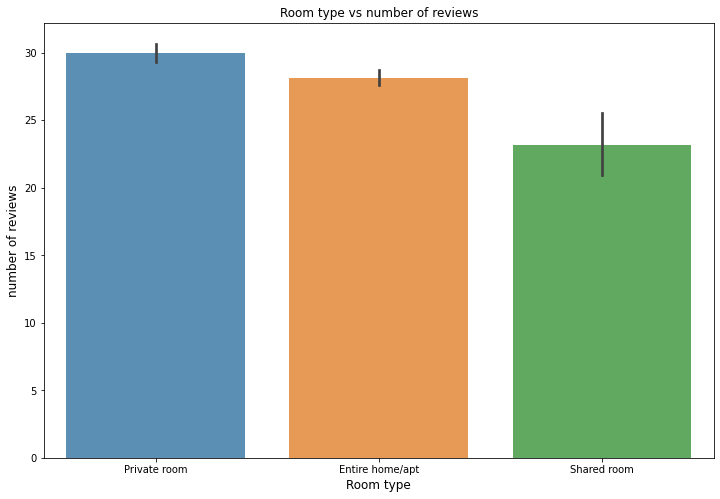

In [52]:
plt.figure(figsize = (12, 8))
sns.barplot(x = airbnb['room type'], y = airbnb['number of reviews'], alpha = 0.8)
plt.title('Room type vs number of reviews')
plt.ylabel('number of reviews', fontsize = 12)
plt.xlabel('Room type', fontsize = 12)
plt.show()

### Relationship between service fee and price

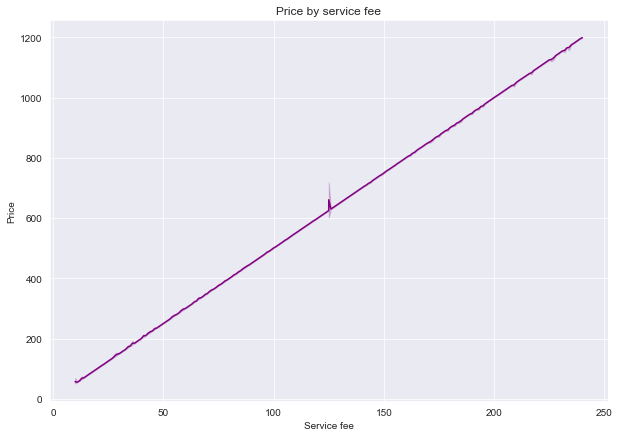

In [53]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')

sns.lineplot(x = 'service fee', y = 'price', data = airbnb, color = 'purple')

plt.title('Price by service fee')
plt.ylabel('Price')
plt.xlabel('Service fee')

plt.show()

### Relationship between availability 365 and price

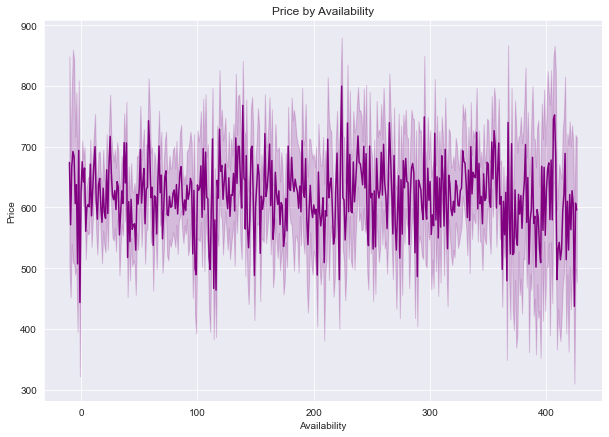

In [54]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')

sns.lineplot(x = 'availability 365', y = 'price', data = airbnb, color = 'purple')

plt.title('Price by Availability')
plt.ylabel('Price')
plt.xlabel('Availability')

plt.show()

### Relationship between minimum nights and price

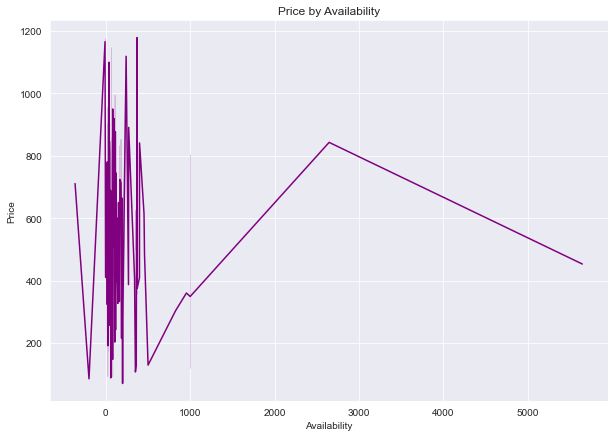

In [55]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')

sns.lineplot(x = 'minimum nights', y = 'price', data = airbnb, color = 'purple')

plt.title('Price by Availability')
plt.ylabel('Price')
plt.xlabel('Availability')

plt.show()

### Relationship between price and reviews

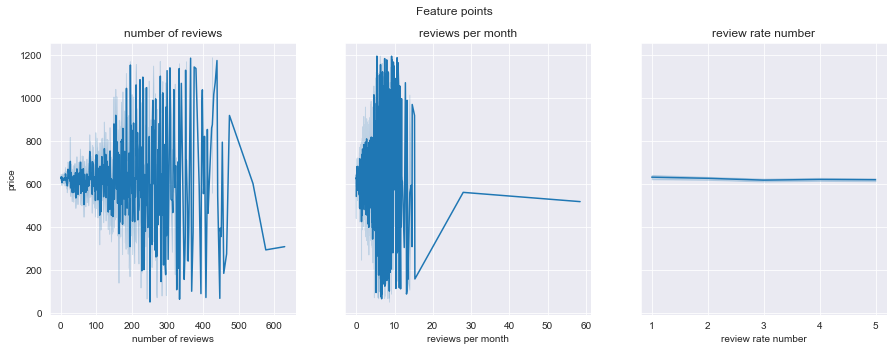

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Feature points')

# number of reviews
sns.lineplot(ax=axes[0], x=airbnb['number of reviews'].values, y=airbnb['price'].values)
axes[0].set(xlabel='number of reviews', ylabel = 'price')
axes[0].set_title(airbnb['number of reviews'].name)
# reviews per month
sns.lineplot(ax=axes[1], x=airbnb['reviews per month'].values, y=airbnb['price'].values)
axes[1].set(xlabel='reviews per month', ylabel = 'price')
axes[1].set_title(airbnb['reviews per month'].name)

# review rate number
sns.lineplot(ax=axes[2],  x=airbnb['review rate number'].values, y=airbnb['price'].values)
axes[2].set(xlabel='review rate number', ylabel = 'price')
axes[2].set_title(airbnb['review rate number'].name);

### Relationship between cancellation policy and price

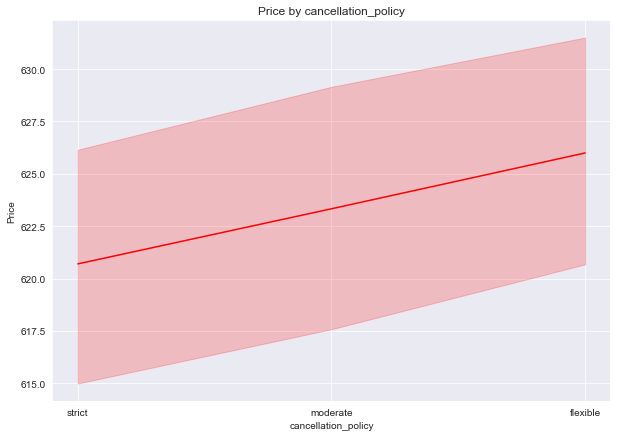

In [57]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')

sns.lineplot(x = 'cancellation_policy', y = 'price', data = airbnb, color = 'red')

plt.title('Price by cancellation_policy')
plt.ylabel('Price')
plt.xlabel('cancellation_policy')

plt.show()

### Price Description

In [58]:
airbnb['price'].describe()

count    40455.000000
mean       623.336160
std        332.010522
min         50.000000
25%        338.000000
50%        623.000000
75%        912.000000
max       1200.000000
Name: price, dtype: float64

C:\Users\hp-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

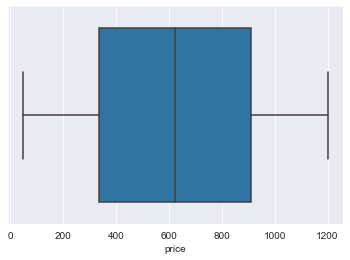

In [59]:
sns.boxplot(airbnb.price)

### Correlation

In [60]:
airbnb.corr()

,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
host id,1.000000,0.003839,-0.008247,0.002299,0.008660,0.008283,-0.004067,-0.008772,-0.004214,0.003723,0.005663,-0.008236
lat,0.003839,1.000000,0.085357,0.013574,-0.006307,-0.006382,0.010804,-0.007412,-0.013378,-0.004972,0.015003,-0.010516
long,-0.008247,0.085357,1.000000,-0.006437,-0.006597,-0.006483,-0.027864,0.081709,0.139390,0.007498,-0.086485,0.049004
Construction year,0.002299,0.013574,-0.006437,1.000000,0.002344,0.002668,0.005870,-0.005109,-0.003306,0.003306,-0.000380,-0.010708
price,0.008660,-0.006307,-0.006597,0.002344,1.000000,0.998419,-0.006538,-0.001221,-0.001465,-0.010242,-0.002188,-0.006453
service fee,0.008283,-0.006382,-0.006483,0.002668,0.998419,1.000000,-0.006811,-0.001212,-0.001442,-0.010097,-0.002023,-0.006723
minimum nights,-0.004067,0.010804,-0.027864,0.005870,-0.006538,-0.006811,1.000000,-0.037739,-0.055864,-0.007591,0.044067,0.033712
number of reviews,-0.008772,-0.007412,0.081709,-0.005109,-0.001221,-0.001212,-0.037739,1.000000,0.651262,-0.035506,-0.063592,0.132649
reviews per month,-0.004214,-0.013378,0.139390,-0.003306,-0.001465,-0.001442,-0.055864,0.651262,1.000000,0.048931,-0.021589,0.076527
review rate number,0.003723,-0.004972,0.007498,0.003306,-0.010242,-0.010097,-0.007591,-0.035506,0.048931,1.000000,0.012205,-0.032350


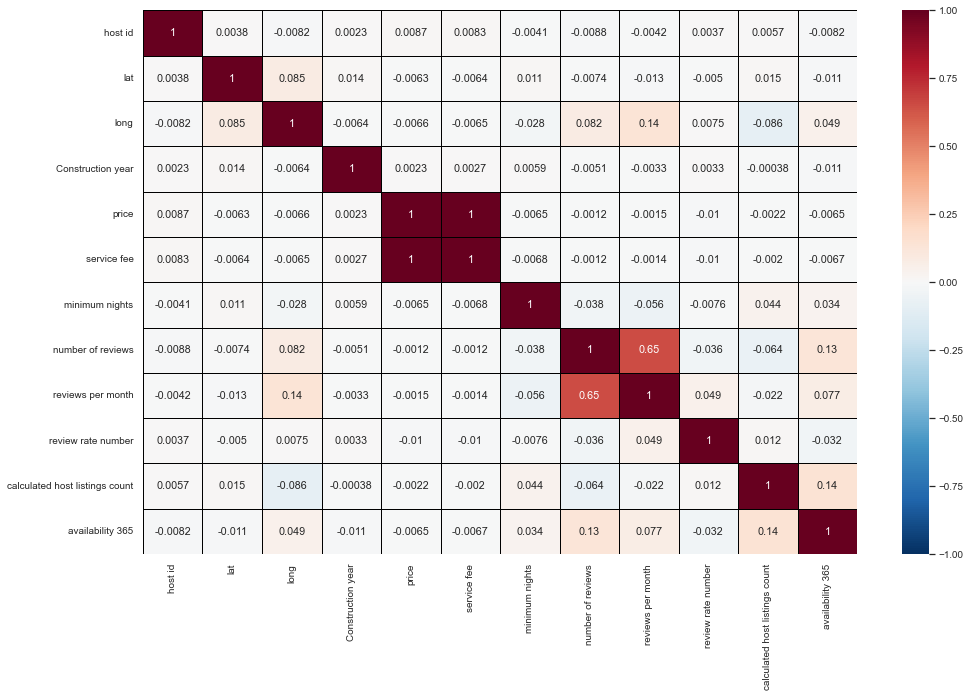

In [61]:
sns.set(font_scale=0.9)
plt.figure(figsize=(16,10))
sns.heatmap(
    airbnb.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1,
    linewidths=0.5, 
    linecolor='black',
    square=False,
);

In [62]:
price_corr = airbnb.corr()['price'].sort_values(ascending = False).head(6)[1:]
price_corr

service fee          0.998419
host id              0.008660
Construction year    0.002344
number of reviews   -0.001221
reviews per month   -0.001465
Name: price, dtype: float64

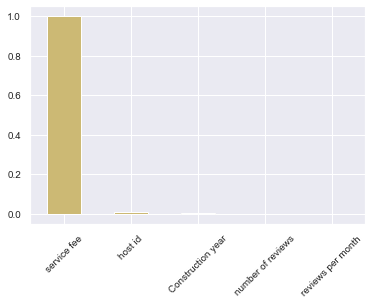

In [63]:
price_corr.plot(kind = 'bar', color = 'y');
plt.xticks(rotation=45);

## Linear Regression

In [64]:
from scipy import stats

In [65]:
x = airbnb.price
x

0          966.0
1          142.0
4          204.0
5          577.0
7         1060.0
           ...  
102587     388.0
102588     618.0
102591    1139.0
102593    1099.0
102595     837.0
Name: price, Length: 40455, dtype: float64

In [66]:
y = airbnb['service fee']
y

0         193.0
1          28.0
4          41.0
5         115.0
7         212.0
          ...  
102587     78.0
102588    124.0
102591    228.0
102593    220.0
102595    167.0
Name: service fee, Length: 40455, dtype: float64

In [67]:
slope, intercept, r, p, std_err = stats.linregress(x,y)